LR.1

In [57]:
import pandas
import numpy as np
from random import randrange,sample,randint
from scipy import linalg
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pandas.read_csv("diabetes2.csv")
df = df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [59]:
outcome_column = df.loc[:, df.columns == 'Outcome'] 
del df['Outcome']
normalized_df = (df-df.mean())/df.std()
normalized_df = pandas.merge(normalized_df, outcome_column, left_index=True, right_index=True)
normalized_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1


In [60]:
data = np.array(normalized_df)
np.random.seed(0)
shuffle = np.random.permutation(len(data))
split = int(len(df)*0.6)

In [61]:
def mse(y_pred,y_test):
    sum_squared_error = np.sum(np.square(y_test - y_pred))
    m_s_e = sum_squared_error/len(y_pred)
    
    return m_s_e

<AxesSubplot:>

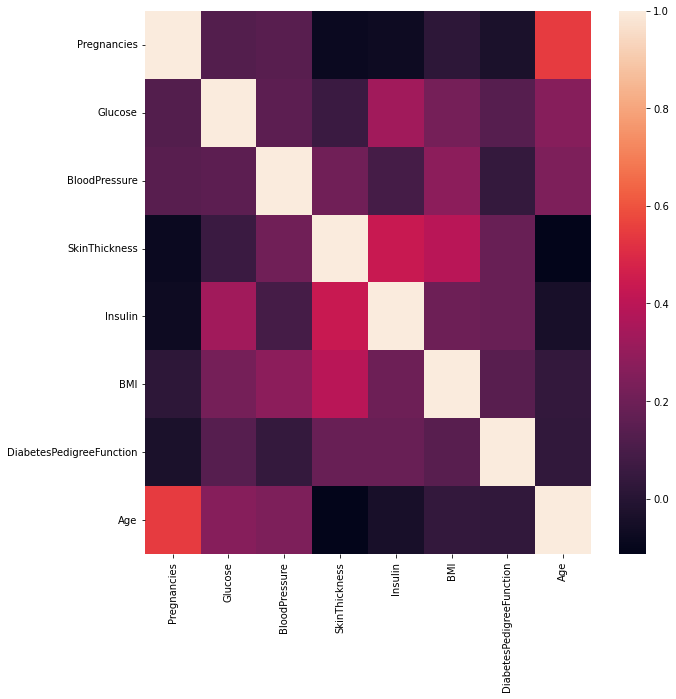

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Multivariate Linear regression


In [64]:
x_linear= np.ones(9*len(data)).reshape(len(data),9)
y_linear= np.ones(len(data)).reshape(len(data),1)

In [65]:
for i in range(len(data)):
    x_linear[i][:-1] = data[i][:-1]
    y_linear[i] = data[i][-1]

In [66]:
x_linear = x_linear[shuffle]
y_linear = y_linear[shuffle]
x_train_linear= x_linear[:split]
y_train_linear = y_linear[:split]

x_test_linear = x_linear[split:]
y_test_linear = y_linear[split:]

In [67]:
def linear_regression_fit(x_train,y_train):
    
    
    x_dash_train = np.transpose(x_train)
    
    w = np.linalg.inv(x_dash_train @ x_train) @ x_dash_train @ y_train 
    
    return w

In [68]:
def linear_regression_predict(x_test,w_star):
    y_pred=  x_test @ w_star
    
    return y_pred

In [69]:
start =  time()
w_star = linear_regression_fit(x_train_linear,y_train_linear)
end = time()
print('Time taken:',end-start,'Seconds')

Time taken: 0.0009963512420654297 Seconds


In [70]:
start = time()
y_pred = linear_regression_predict(x_test_linear,w_star)
end = time()
print('Time taken:',end-start,'Seconds')

Time taken: 0.0 Seconds


In [71]:
print("The mean squared error for the Linear Regression is {}".format(mse(y_pred,y_test_linear)))

The mean squared error for the Linear Regression is 0.16897622944102078


LR.2


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import sqrt 

In [73]:
df = pd.read_csv('diabetes2.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
scaled_df = (df - df.mean()) / df.std()

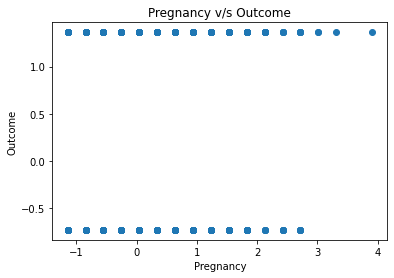

In [78]:
plt.scatter(scaled_df['Pregnancies'],scaled_df['Outcome'])
plt.xlabel("Pregnancy")
plt.ylabel("Outcome")
plt.title("Pregnancy v/s Outcome")
plt.show()

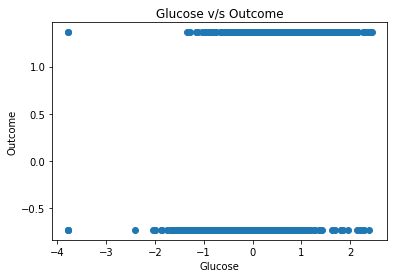

In [79]:
plt.scatter(scaled_df['Glucose'],scaled_df['Outcome'])
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Glucose v/s Outcome")
plt.show()

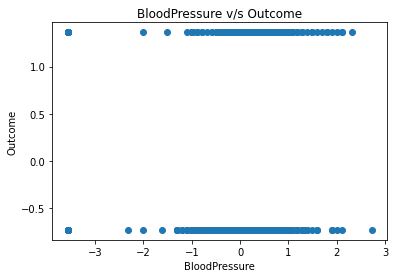

In [80]:
plt.scatter(scaled_df['BloodPressure'],scaled_df['Outcome'])
plt.xlabel("BloodPressure")
plt.ylabel("Outcome")
plt.title("BloodPressure v/s Outcome")
plt.show()

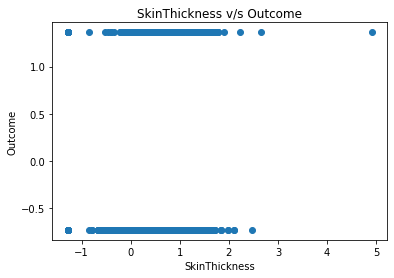

In [81]:
plt.scatter(scaled_df['SkinThickness'],scaled_df['Outcome'])
plt.xlabel("SkinThickness")
plt.ylabel("Outcome")
plt.title("SkinThickness v/s Outcome")
plt.show()

In [82]:
# Insulin,BMI,DiabetesPedigreeFunction,Age

In [83]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,:-1],scaled_df['Outcome'], test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [84]:
X_train['X_0']=1
X_test['X_0']=1

In [85]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

With sckit linear regression model

In [86]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
coef = model.coef_
intercept = model.intercept_

C:\Users\yash sankpal\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [87]:
coef


array([ 0.12973058,  0.38069121, -0.10321733,  0.00560418, -0.03270004,
        0.23189549,  0.11505105,  0.08119332,  0.        ])

In [88]:
intercept

-0.01768825755994269

In [89]:
loss_1 = sum((y_pred - y_test)**2)
MSE_1 = loss_1/len(y_pred)
MSE_1

0.6916288627985884

Without scikit

In [90]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [91]:
n= 9
t = np.zeros(n)
m = len(X_train)
alpha = 0.2
epochs = 50
cost = np.array([])
theta_0 = np.array([])
theta_1 = np.array([])
theta_2 = np.array([])
theta_3 = np.array([])
theta_4 = np.array([])

In [92]:
for epoch in range(0,epochs):
    for j in range(n):
        for i in range(m):
            t[j] = t[j] - (alpha/m)*((sum(X_train[i]*t)-y_train[i])*X_train[i][j])
            c = ((sum(X_train[i]*t)-y_train[i])**2)/(2*m)
    print(c)
    cost = np.append(cost,c,axis = None)
    theta_0 = np.append(theta_0,t[0],axis = None) 
    theta_1 = np.append(theta_1,t[1],axis = None)
    theta_2 = np.append(theta_2,t[2],axis = None)
    theta_3 = np.append(theta_3,t[3],axis = None)
    theta_4 = np.append(theta_4,t[4],axis = None)

0.00024033665468336818
0.00012653289880836189
6.77696240727752e-05
3.687957070398283e-05
2.035393900916458e-05
1.1364083981657769e-05
6.398417712631457e-06
3.6190825021370843e-06
2.0470131817878528e-06
1.1514466410196914e-06
6.397613687443423e-07
3.4806185926918625e-07
1.8323393224068224e-07
9.172775921381878e-08
4.245166510380075e-08
1.7241059242608802e-08
5.462349076034618e-09
9.115611963716647e-10
7.1552628090584056e-12
7.242234721209358e-10
1.9597169690259033e-09
3.151701900215697e-09
4.050155310521019e-09
4.579085739423127e-09
4.7541178924273355e-09
4.6339218928840905e-09
4.292315203125436e-09
3.802944392181069e-09
3.231545709392837e-09
2.6326860411631736e-09
2.0490672275780116e-09
1.5122152121197166e-09
1.0438389568819759e-09
6.574350947481849e-10
3.5989643093271716e-10
1.529954209113947e-10
3.468278731715789e-11
1.8252434977311919e-13
4.2887952354354184e-11
1.5507584088329264e-10
3.284611739856845e-10
5.546166217047004e-10
8.25279952021589e-10
1.1325705684455792e-09
1.4691337715

In [93]:
t

array([ 0.12996084,  0.38027117, -0.09894601,  0.00534181, -0.03492235,
        0.23125791,  0.11507161,  0.08072854, -0.01684487])

In [94]:
Epochs = list(range(epochs))

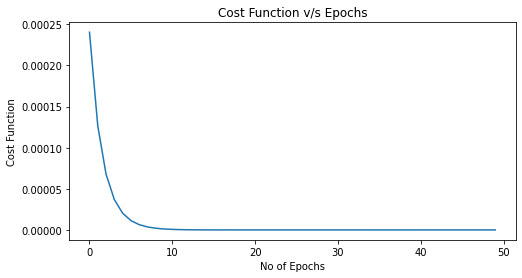

In [95]:
plt.figure(figsize=(8,4))
plt.plot(Epochs,cost)
plt.xlabel("No of Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function v/s Epochs")
plt.show()

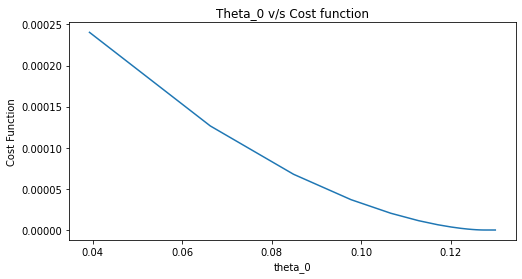

In [96]:
plt.figure(figsize=(8,4))
plt.plot(theta_0,cost)
plt.xlabel("theta_0")
plt.ylabel("Cost Function")
plt.title("Theta_0 v/s Cost function")
plt.show()

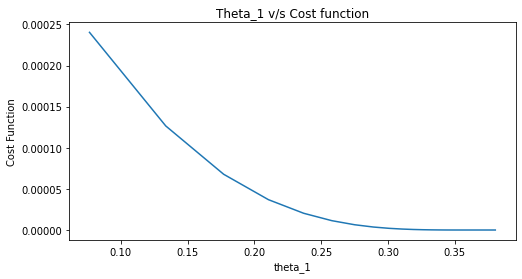

In [97]:
plt.figure(figsize=(8,4))
plt.plot(theta_1,cost)
plt.xlabel("theta_1")
plt.ylabel("Cost Function")
plt.title("Theta_1 v/s Cost function")
plt.show()

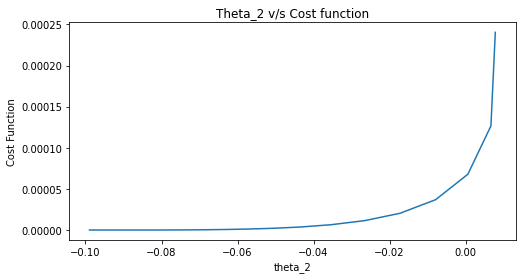

In [98]:
plt.figure(figsize=(8,4))
plt.plot(theta_2,cost)
plt.xlabel("theta_2")
plt.ylabel("Cost Function")
plt.title("Theta_2 v/s Cost function")
plt.show()

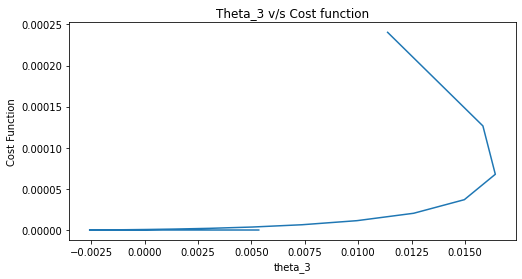

In [99]:
plt.figure(figsize=(8,4))
plt.plot(theta_3,cost)
plt.xlabel("theta_3")
plt.ylabel("Cost Function")
plt.title("Theta_3 v/s Cost function")
plt.show()

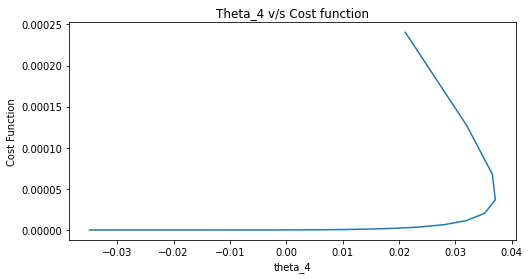

In [100]:
plt.figure(figsize=(8,4))
plt.plot(theta_4,cost)
plt.xlabel("theta_4")
plt.ylabel("Cost Function")
plt.title("Theta_4 v/s Cost function")
plt.show()

In [101]:
pred_2= list()
for e in X_test:
    pred_2.append(sum(t*e))
y_pred_2=np.array(pred_2)   
y_pred_2

array([ 1.26596013e+00, -8.07156457e-01,  4.49176145e-01,  3.59271746e-02,
        5.32590333e-01,  2.30494782e-01, -2.87956291e-01, -9.04157468e-01,
        2.52693055e-01,  1.81722665e-01, -2.82656544e-02,  4.20364050e-02,
        3.13171452e-01, -1.10625606e-01,  1.82239776e-01,  8.22324673e-01,
       -5.48334152e-01, -8.52013044e-02,  3.19686363e-02, -6.51250047e-01,
       -5.59478581e-01,  7.09754865e-01,  3.89103486e-01, -3.21657184e-01,
        4.91761885e-01,  7.31520064e-01, -5.16977919e-01, -1.84241935e+00,
        6.58414082e-01,  3.45429328e-02,  9.55293229e-02, -5.86289991e-01,
        8.48129599e-01, -6.87938039e-01, -9.87513575e-01,  7.45038758e-02,
       -3.39412718e-01, -1.95237965e-01,  6.89422415e-01, -5.01075281e-02,
       -1.92765367e-01,  1.06088982e+00,  6.02346092e-01,  3.77231402e-01,
        3.05192661e-04,  7.79926398e-01,  6.19636946e-01,  1.71320252e-01,
       -4.40098857e-01,  1.57302112e-01, -6.17162790e-01,  1.44859125e+00,
        5.19218234e-01,  

In [102]:
loss_2 = sum((y_pred_2 - y_test)**2)
MSE_2 = loss_2/len(y_test)
MSE_2


0.6911275945984121

In [103]:
MSE_1

0.6916288627985884

In [104]:
MSE_2

0.6911275945984121